In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

In [5]:
# Salt & Pepper noise
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy = np.copy(image)
    total_pixels = image.shape[0] * image.shape[1]

    # Salt (white pixels)
    num_salt = int(np.ceil(salt_prob * total_pixels))
    coords = (np.random.randint(0, image.shape[0], num_salt),
              np.random.randint(0, image.shape[1], num_salt))
    noisy[coords] = 255

    # Pepper (black pixels)
    num_pepper = int(np.ceil(pepper_prob * total_pixels))
    coords = (np.random.randint(0, image.shape[0], num_pepper),
              np.random.randint(0, image.shape[1], num_pepper))
    noisy[coords] = 0

    return noisy

In [6]:
# Impulse noise (random intensity values at random positions)
def add_impulse_noise(image, noise_prob=0.02):
    noisy = np.copy(image)
    total_pixels = image.shape[0] * image.shape[1]
    num_noisy = int(np.ceil(noise_prob * total_pixels))

    coords = (np.random.randint(0, image.shape[0], num_noisy),
              np.random.randint(0, image.shape[1], num_noisy))
    random_values = np.random.randint(0, 256, num_noisy).astype(np.uint8)

    noisy[coords] = random_values
    return noisy

In [7]:
# Histogram plotter
def plot_histogram(image, title="Histogram"):
    plt.hist(image.ravel(), bins=256, range=[0,256], color='gray')
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

In [8]:
# Load grayscale image
img = cv2.imread("Peacock.jpg", cv2.IMREAD_GRAYSCALE)

In [9]:
if img is None:
    img = np.zeros((256,256), dtype=np.uint8)
    cv2.circle(img, (128,128), 60, 200, -1)
    cv2.rectangle(img, (30,30), (80,80), 150, -1)

In [10]:
# Apply noises
gauss_img = add_gaussian_noise(img, mean=0, sigma=25)
sp_img = add_salt_pepper_noise(img, salt_prob=0.01, pepper_prob=0.01)
impulse_img = add_impulse_noise(img, noise_prob=0.02)

In [11]:
# Organize results
images = [img, gauss_img, sp_img, impulse_img]
titles = ["Original", "Gaussian Noise", "Salt & Pepper Noise", "Impulse Noise"]

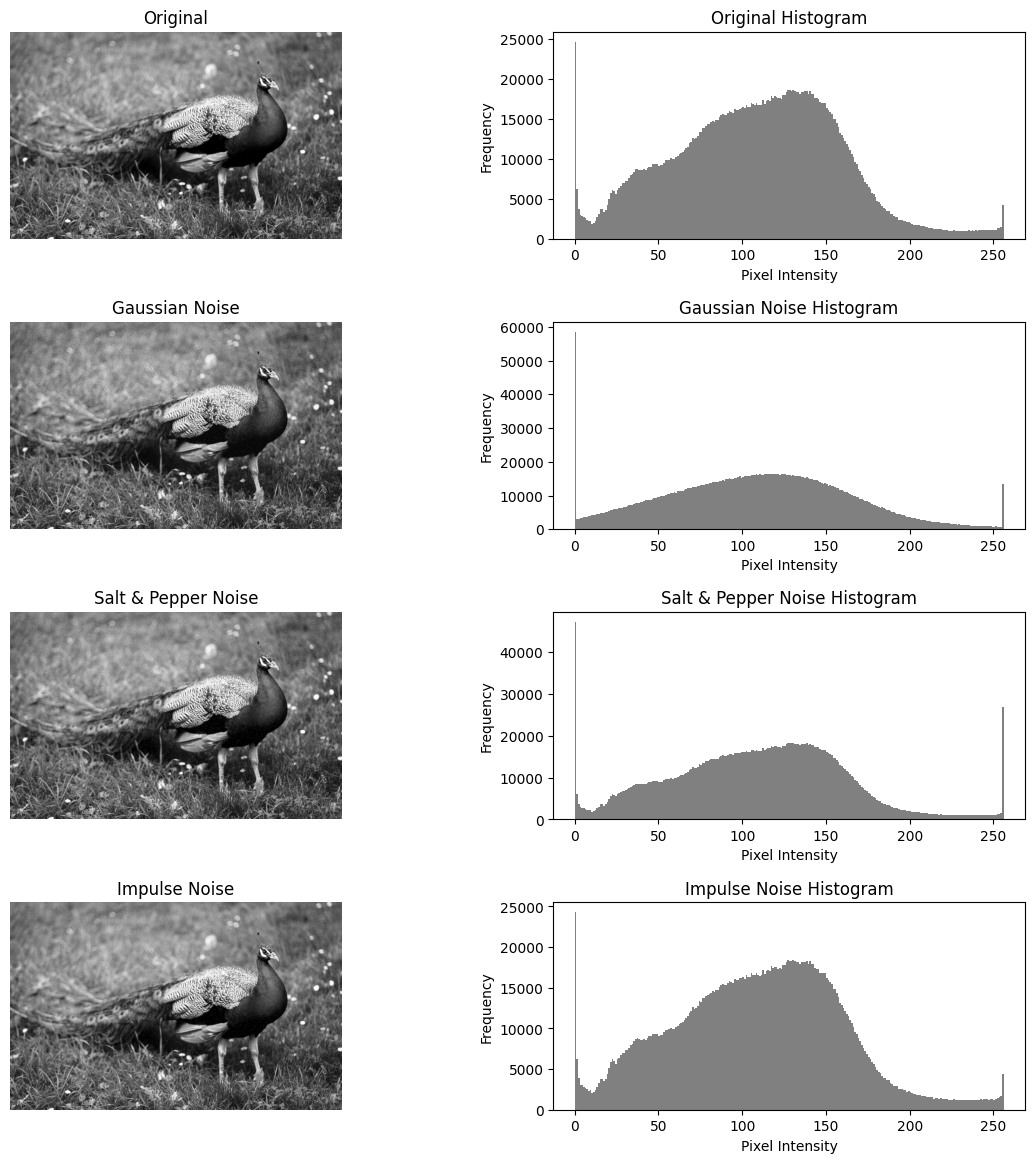

In [16]:
# Use subplots with spacing
fig, axes = plt.subplots(4, 2, figsize=(14, 14))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # add vertical + horizontal spacing

for i in range(4):
    axes[i, 0].imshow(images[i], cmap='gray')
    axes[i, 0].set_title(titles[i])
    axes[i, 0].axis("off")

    axes[i, 1].hist(images[i].ravel(), bins=256, range=[0,256], color='gray')
    axes[i, 1].set_title(f"{titles[i]} Histogram")
    axes[i, 1].set_xlabel("Pixel Intensity")
    axes[i, 1].set_ylabel("Frequency")

In [13]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>